In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display, Markdown

In [17]:
def selectkbest(indep_X, dep_Y, n):
    # Step 1: Initialize SelectKBest with Chi-Square test
    test = SelectKBest(score_func=chi2, k=n)
    
    # Step 2: Fit the selector to the features (X) and target (y)
    fit1 = test.fit(indep_X, dep_Y)
    
    # Step 3: Transform the dataset to keep only the top 'n' features
    selectk_features = fit1.transform(indep_X)
    
    # --- Print debug information ---
    print("\n=== SelectKBest Feature Selection ===")
    print(f"Original feature shape: {indep_X.shape}")      # (rows, total features before)
    print(f"Reduced feature shape: {selectk_features.shape}")  # (rows, n features after)
    
    # Get selected feature names
    selected_mask = test.get_support()
    selected_columns = indep_X.columns[test.get_support()]
    selected_scores = fit1.scores_[selected_mask]

    # ----- Quick visualization -----
    try:
        plt.figure(figsize=(8, 5))
        plt.barh(selected_columns, selected_scores)
        plt.xlabel("Chi² Score")
        plt.ylabel("Feature")
        plt.title(f"Top {n} Features Selected by Chi² Test")
        plt.gca().invert_yaxis()  # highest score at the top
        plt.tight_layout()
        plt.show()
    except Exception as e:
        # In case plotting is unavailable (e.g., headless env), don't break execution
        print(f"(Plot skipped: {e})")
    
    # Step 4: Return the reduced features (NumPy array)
    return selectk_features

In [18]:
def split_scalar(indep_X,dep_Y):
        # Step 1: Split into training (75%) and testing (25%) sets
        X_train, X_test, y_train, y_test = train_test_split(
            indep_X, dep_Y, test_size=0.25, random_state=0
        )
    
        # Step 2: Initialize the StandardScaler
        sc = StandardScaler()
    
        # Step 3: Fit scaler on training data and transform it
        X_train = sc.fit_transform(X_train)
    
        # Step 4: Transform test data using same scaler (to avoid data leakage)
        X_test = sc.transform(X_test)
    
        # Step 5: Return scaled features and labels
        return X_train, X_test, y_train, y_test
    

In [19]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

In [20]:
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm    

In [21]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [22]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [23]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         

In [24]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [25]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      

In [26]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [27]:
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [28]:
def render_mermaid(diagram_code: str):
    html = f"""
    <div class="mermaid">
    {diagram_code}
    </div>

    <script>
    // Load Mermaid only once
    if (typeof mermaid === 'undefined') {{
        var script = document.createElement("script");
        script.type = "text/javascript";
        script.src = "https://cdn.jsdelivr.net/npm/mermaid@10/dist/mermaid.min.js";
        script.onload = () => {{
            mermaid.initialize({{ startOnLoad: true }});
            mermaid.init(undefined, document.querySelectorAll(".mermaid"));
        }};
        document.head.appendChild(script);
    }} else {{
        mermaid.init(undefined, document.querySelectorAll(".mermaid"));
    }}
    </script>
    """
    return HTML(html)

In [53]:
def plot_result_table(table):
    """
    Plot classifier accuracies from a result table with
    classifiers on X-axis and accuracy on Y-axis.
    
    Parameters:
        table (pd.DataFrame): DataFrame with feature selection methods as rows
                              and classifiers as columns.
    """
    # Take the first row (ChiSquare here)
    method = table.index[0]
    values = table.iloc[0].values
    classifiers = table.columns.tolist()

    plt.figure(figsize=(8,5))
    bars = plt.bar(classifiers, values, color="skyblue")

    # Add values on top of bars
    for bar, acc in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                 f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

    plt.ylabel(f"Accuracy ({method})", fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.title(f"Classifier Performance using {method} Feature Selection", fontsize=14, fontweight="bold")
    plt.ylim(0.8, 1.0)  # focus on high accuracy range
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [29]:
def show_problem_and_algorithm():
    text = """
# 📌 Problem Statement

Chronic Kidney Disease (CKD) is a major health concern, and **early detection** is crucial for effective treatment.  

Given a dataset (`prep.csv`) containing **medical test results and patient information** (e.g., age, blood pressure, sugar levels, red/white blood cell count, etc.), the objective is to classify patients into two categories:

- ✅ **Yes** → Patient likely has CKD  
- ❌ **No**  → Patient does not have CKD  

The goal is to build a **machine learning classification model** that predicts CKD presence, compares different classifiers, and identifies the **best-performing algorithm** after applying feature selection (e.g., Chi-Square).  

---

# 📌 Algorithm

### Step 1: Data Preprocessing  
- Load dataset (`prep.csv`)  
- Handle missing values  
- Encode categorical variables  
- Normalize/scale numerical features if required  

### Step 2: Feature Selection  
- Apply **Chi-Square feature selection** to identify relevant features  
- Select top features for training  

### Step 3: Train-Test Split  
- Split dataset into **training (70%)** and **testing (30%)**  

### Step 4: Train Multiple Classifiers  
- Logistic Regression  
- SVM (Linear)  
- SVM (Non-Linear/RBF)  
- KNN  
- Naive Bayes  
- Decision Tree  
- Random Forest  

For each classifier:  
👉 Train → Predict → Evaluate (**Accuracy, Precision, Recall, F1-Score, Confusion Matrix**)  

### Step 5: Collect Results  
- Store accuracy scores of all classifiers  
- Compare results using `selectk_Classification()`  

### Step 6: Visualization  
- Plot accuracies (**Classifiers vs Accuracy**)  
- Highlight best-performing classifier  

### Step 7: Conclusion  
- Select **best classifier** for CKD prediction  
"""
    display(Markdown(text))

In [30]:
show_problem_and_algorithm()


# 📌 Problem Statement

Chronic Kidney Disease (CKD) is a major health concern, and **early detection** is crucial for effective treatment.  

Given a dataset (`prep.csv`) containing **medical test results and patient information** (e.g., age, blood pressure, sugar levels, red/white blood cell count, etc.), the objective is to classify patients into two categories:

- ✅ **Yes** → Patient likely has CKD  
- ❌ **No**  → Patient does not have CKD  

The goal is to build a **machine learning classification model** that predicts CKD presence, compares different classifiers, and identifies the **best-performing algorithm** after applying feature selection (e.g., Chi-Square).  

---

# 📌 Algorithm

### Step 1: Data Preprocessing  
- Load dataset (`prep.csv`)  
- Handle missing values  
- Encode categorical variables  
- Normalize/scale numerical features if required  

### Step 2: Feature Selection  
- Apply **Chi-Square feature selection** to identify relevant features  
- Select top features for training  

### Step 3: Train-Test Split  
- Split dataset into **training (70%)** and **testing (30%)**  

### Step 4: Train Multiple Classifiers  
- Logistic Regression  
- SVM (Linear)  
- SVM (Non-Linear/RBF)  
- KNN  
- Naive Bayes  
- Decision Tree  
- Random Forest  

For each classifier:  
👉 Train → Predict → Evaluate (**Accuracy, Precision, Recall, F1-Score, Confusion Matrix**)  

### Step 5: Collect Results  
- Store accuracy scores of all classifiers  
- Compare results using `selectk_Classification()`  

### Step 6: Visualization  
- Plot accuracies (**Classifiers vs Accuracy**)  
- Highlight best-performing classifier  

### Step 7: Conclusion  
- Select **best classifier** for CKD prediction  


In [31]:
dataset1=pd.read_csv("prep.csv",index_col=None)

In [32]:
df2=dataset1

In [33]:
print("Before dummies:", df2.shape)

Before dummies: (399, 25)


In [34]:
df2 = pd.get_dummies(df2, drop_first=True)

In [35]:
print("After dummies:", df2.shape)
print("New columns:", df2.columns.tolist()[-10:])  # show last 10 columns

After dummies: (399, 28)
New columns: ['pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_yes', 'pe_yes', 'ane_yes', 'classification_yes']


In [36]:
indep_X = df2.drop('classification_yes', axis=1)
dep_Y = df2['classification_yes']

In [37]:
# Print shapes
print("Shape of full dataset:", df2.shape)
print("Shape of Features (indep_X):", indep_X.shape)
print("Shape of Target (dep_Y):", dep_Y.shape)

# Print first few rows of features
print("\nIndependent Variables (X):")
print(indep_X.head())

# Print first few rows of target
print("\nDependent Variable (y):")
print(dep_Y.head())

Shape of full dataset: (399, 28)
Shape of Features (indep_X): (399, 27)
Shape of Target (dep_Y): (399,)

Independent Variables (X):
   age         bp   al   su         bgr         bu        sc         sod  \
0  2.0  76.459948  3.0  0.0  148.112676  57.482105  3.077356  137.528754   
1  3.0  76.459948  2.0  0.0  148.112676  22.000000  0.700000  137.528754   
2  4.0  76.459948  1.0  0.0   99.000000  23.000000  0.600000  138.000000   
3  5.0  76.459948  1.0  0.0  148.112676  16.000000  0.700000  138.000000   
4  5.0  50.000000  0.0  0.0  148.112676  25.000000  0.600000  137.528754   

        pot       hrmo  ...  rbc_normal  pc_normal  pcc_present  ba_present  \
0  4.627244  12.518156  ...        True      False        False       False   
1  4.627244  10.700000  ...        True       True        False       False   
2  4.400000  12.000000  ...        True       True        False       False   
3  3.200000   8.100000  ...        True       True        False       False   
4  4.627244  11.


=== SelectKBest Feature Selection ===
Original feature shape: (399, 27)
Reduced feature shape: (399, 5)


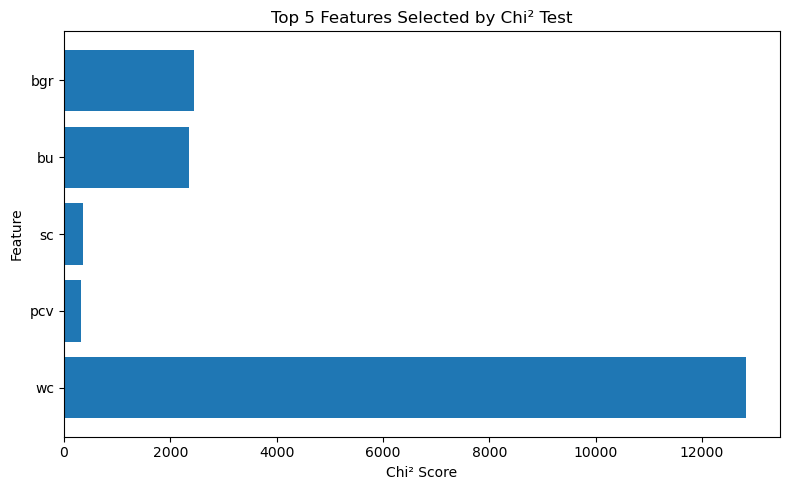

In [38]:
kbest=selectkbest(indep_X,dep_Y,5)       

In [39]:
# Initialize empty lists to store accuracy results for each classifier
# (We will append model accuracies after training each model)

acclog = []     # Logistic Regression accuracies
accsvml = []    # Support Vector Machine (Linear kernel) accuracies
accsvmnl = []   # Support Vector Machine (Non-linear, RBF kernel) accuracies
accknn = []     # K-Nearest Neighbors accuracies
accnav = []     # Naive Bayes accuracies
accdes = []     # Decision Tree accuracies
accrf = []      # Random Forest accuracies

In [40]:
# Split the reduced feature set (kbest) and target (dep_Y) 
# into training and testing sets, and apply standard scaling 
# so that all features have mean=0 and std=1
X_train, X_test, y_train, y_test=split_scalar(kbest,dep_Y)   

In [41]:
# Train Logistic Regression and get accuracy
classifier, Accuracy, report, X_test, y_test, cm = logistic(X_train, y_train, X_test)
# Save accuracy in list for later comparison
acclog.append(Accuracy)

In [42]:
# Train SVM with linear kernel and get accuracy
classifier, Accuracy, report, X_test, y_test, cm = svm_linear(X_train, y_train, X_test)
# Save accuracy in list for later comparison
accsvml.append(Accuracy)

In [43]:
# Run Non-Linear SVM and get results
classifier, Accuracy, report, X_test, y_test, cm = svm_NL(X_train, y_train, X_test)
# Store accuracy in the list
accsvmnl.append(Accuracy)

In [44]:
# Run KNN classifier and get results
classifier, Accuracy, report, X_test, y_test, cm = knn(X_train, y_train, X_test)
# Store accuracy in the list
accknn.append(Accuracy)

In [45]:
# Run Naive Bayes classifier and get results
classifier, Accuracy, report, X_test, y_test, cm = Navie(X_train, y_train, X_test)
# Store accuracy in the list
accnav.append(Accuracy)

In [46]:
# Run Decision Tree classifier and get results
classifier, Accuracy, report, X_test, y_test, cm = Decision(X_train, y_train, X_test)
# Store accuracy in the list
accdes.append(Accuracy)

In [47]:
# Run Random Forest classifier and get results
classifier, Accuracy, report, X_test, y_test, cm = random(X_train, y_train, X_test)
# Store accuracy in the list
accrf.append(Accuracy)

In [48]:
# Collect all classifier accuracies and select the best one
result = selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf)

C:\Users\mukil\AppData\Local\Temp\ipykernel_11336\2634354880.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe['Logistic'][idex]=acclog[number]
C:\Users\mukil\AppData\Local\Temp\ipykernel_11336\2634354880.py:6: FutureWarning: Cha

In [49]:
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.94,0.94,0.95,0.89,0.83,0.96,0.95


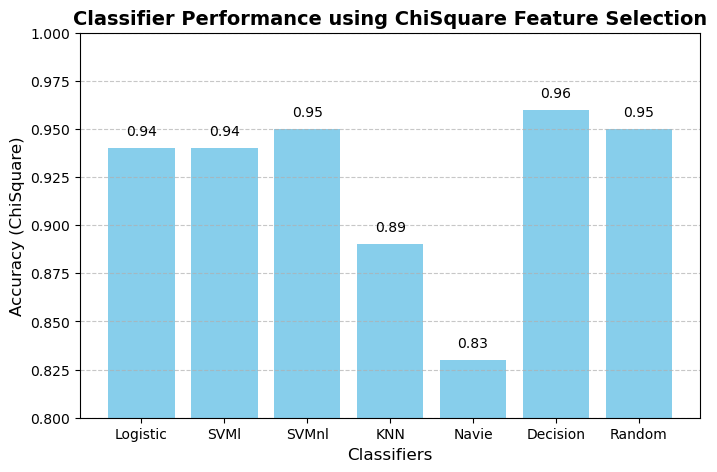

In [54]:
plot_result_table(pd.DataFrame(result, index=["ChiSquare"]))

In [55]:
diagram = """
sequenceDiagram
    participant U as User
    participant D as Dataset (prep.csv) 
    participant FS as selectkbest (Chi-Square)
    participant T as split_scalar
    participant L as logistic(x,y -train & test sets)
    participant O as random, naive, all others
    participant P as plot_result_table
    
    U->>D: Load dataset
    D->>FS: Apply Feature Selection (Chi-Square)
    FS->>T: Train the model with 75%, 25%
    T->>L: Train Logistic Regression
    L->>O: Append Accuracy to respective python list
    O->>P:  Print the result in table
"""
render_mermaid(diagram)